In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn  as sns

# Load Database & Info

In [7]:
df = pd.read_csv('./Iris.csv')
df.head

<bound method NDFrame.head of       Id  sepall  sepalw  petall  petalw         species
0      1     5.1     3.5     1.4     0.2     Iris-setosa
1      2     4.9     3.0     1.4     0.2     Iris-setosa
2      3     4.7     3.2     1.3     0.2     Iris-setosa
3      4     4.6     3.1     1.5     0.2     Iris-setosa
4      5     5.0     3.6     1.4     0.2     Iris-setosa
..   ...     ...     ...     ...     ...             ...
145  146     6.7     3.0     5.2     2.3  Iris-virginica
146  147     6.3     2.5     5.0     1.9  Iris-virginica
147  148     6.5     3.0     5.2     2.0  Iris-virginica
148  149     6.2     3.4     5.4     2.3  Iris-virginica
149  150     5.9     3.0     5.1     1.8  Iris-virginica

[150 rows x 6 columns]>

In [8]:
df = df.drop(columns = ['Id'])
df.head()

,sepall,sepalw,petall,petalw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,sepall,sepalw,petall,petalw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepall   150 non-null    float64
 1   sepalw   150 non-null    float64
 2   petall   150 non-null    float64
 3   petalw   150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['species'].value_counts() 

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# preprocessing

In [12]:
df.isnull().sum()

sepall     0
sepalw     0
petall     0
petalw     0
species    0
dtype: int64

# Exploratory data analysis

### Histogram

<Axes: >

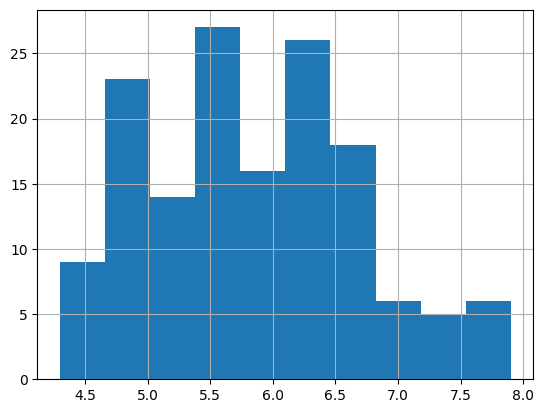

In [13]:
df['sepall'].hist()

<Axes: >

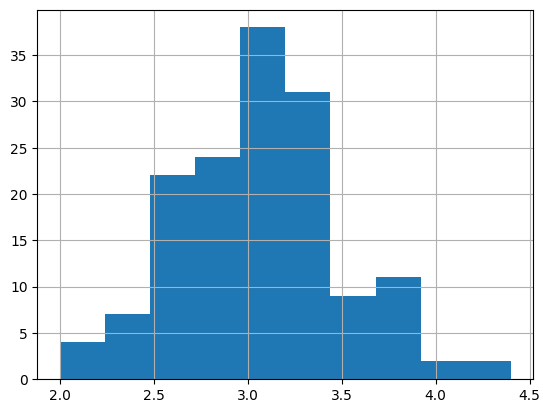

In [14]:
df['sepalw'].hist()

<Axes: >

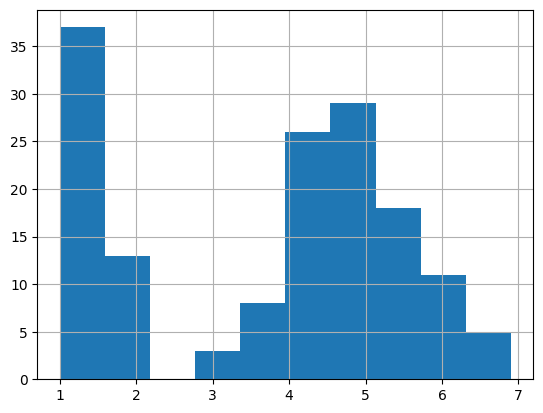

In [15]:
df['petall'].hist()

<Axes: >

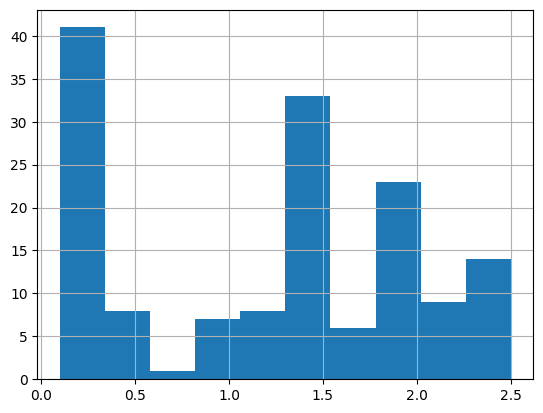

In [16]:
df['petalw'].hist()

### Scatterplot

In [17]:
colors = ['red', 'orange', 'blue']
species =['Iris-setosa','Iris-versicolor','Iris-virginica']

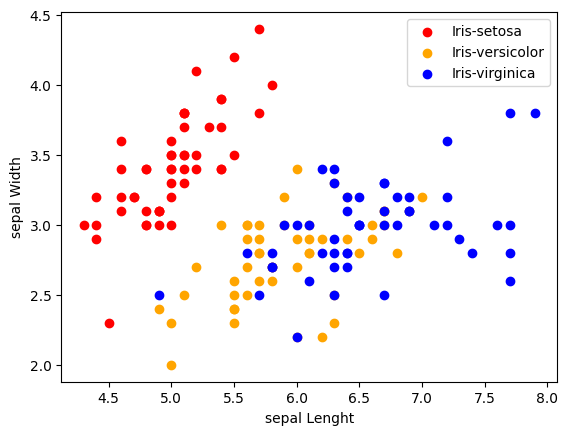

In [18]:
for i in range(3):
    x = df[ df[ 'species'] == species[i]]
    plt.scatter(x['sepall'], x['sepalw'] ,c = colors[i], label = species[i])
plt.xlabel("sepal Lenght")
plt.ylabel("sepal Width")
plt.legend()    

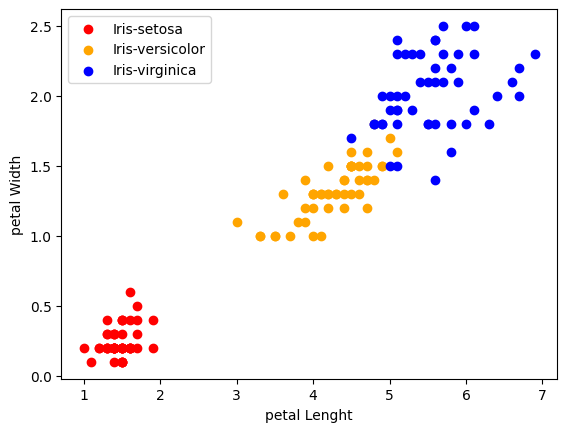

In [19]:
for i in range(3):
    x = df[ df[ 'species'] == species[i]]
    plt.scatter(x['petall'], x['petalw'] ,c = colors[i], label = species[i])
plt.xlabel("petal Lenght")
plt.ylabel("petal Width")
plt.legend()     

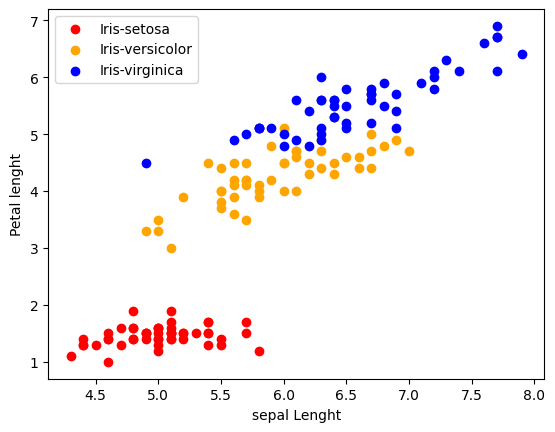

In [20]:
for i in range(3):
    x = df[ df[ 'species'] == species[i]]
    plt.scatter(x['sepall'], x['petall'] ,c = colors[i], label = species[i])
plt.xlabel("sepal Lenght")
plt.ylabel("Petal lenght")
plt.legend()    

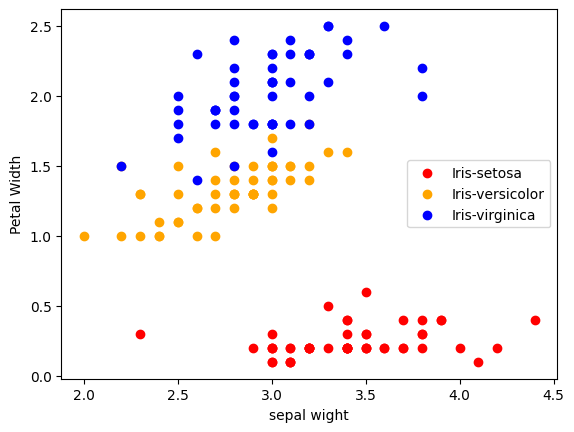

In [21]:
for i in range(3):
    x = df[ df[ 'species'] == species[i]]
    plt.scatter(x['sepalw'], x['petalw'] ,c = colors[i], label = species[i])
plt.xlabel("sepal wight")
plt.ylabel("Petal Width")
plt.legend()    

# Coorelation Matrix

In [42]:
df.corr( numeric_only=True)

,sepall,sepalw,petall,petalw
sepall,1.000000,-0.109369,0.871754,0.817954
sepalw,-0.109369,1.000000,-0.420516,-0.356544
petall,0.871754,-0.420516,1.000000,0.962757
petalw,0.817954,-0.356544,0.962757,1.000000


<Axes: >

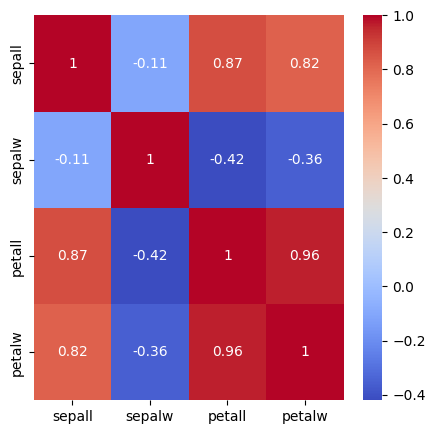

In [47]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot= True, ax=ax , cmap= 'coolwarm')

# Label Encoder

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepall,sepalw,petall,petalw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model training

In [54]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['species'])
y = df['species']
x_train,x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)

In [55]:
# logictic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [56]:
model.fit(x_train, y_train)

LogisticRegression()

In [57]:
# print metric to get performance
print("accuracy:" , model.score(x_test, y_test)*100)

accuracy: 97.77777777777777


In [59]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
# print metric to get performance
print("accuracy:" , model.score(x_test, y_test)*100)

accuracy: 95.55555555555556


In [61]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
# print metric to get performance
print("accuracy:" , model.score(x_test, y_test)*100)

accuracy: 97.77777777777777
